In [1]:
# Import required liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

C:\Users\gaura\AppData\Local\Temp\ipykernel_14464\3907321368.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


In [3]:
print("Train Dataset")
train_df

Train Dataset


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
print("Test Dataset")
test_df

Test Dataset


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


## Task 1
#### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [7]:
# Count promotions in the train Dataset
train_promo_counts = train_df['Promo'].value_counts()

# Count promotions in the test Dataset
test_promo_counts = test_df['Promo'].value_counts()

print("Train Dataset Promotion Distribution:")
print(train_promo_counts)

print("\nTest Dataset Promotion Distribution:")
print(test_promo_counts)

Train Dataset Promotion Distribution:
Promo
0    629129
1    388080
Name: count, dtype: int64

Test Dataset Promotion Distribution:
Promo
0    24824
1    16264
Name: count, dtype: int64


In [8]:
# Calculate percentage of promotions in the train set
total_train_promo = len(train_df)
train_promo_percentage = train_promo_counts / total_train_promo

# Calculate percentage of promotions in the test set
total_test_promo = len(test_df)
test_promo_percentage = test_promo_counts / total_test_promo


print("Train Dataset Promotion Distribution (Percentage):")
print(train_promo_percentage)

print("\nTest Dataset Promotion Distribution (Percentage):")
print(test_promo_percentage)

Train Dataset Promotion Distribution (Percentage):
Promo
0    0.618485
1    0.381515
Name: count, dtype: float64

Test Dataset Promotion Distribution (Percentage):
Promo
0    0.604167
1    0.395833
Name: count, dtype: float64


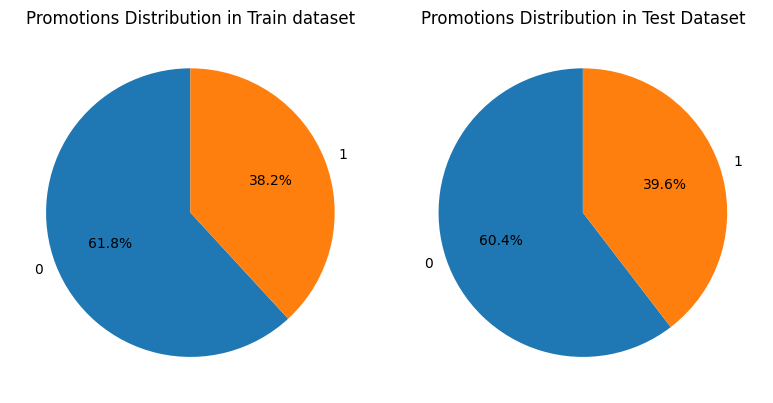

In [9]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot promotions distribution in the training set
axes[0].pie(train_promo_counts, labels=train_promo_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Promotions Distribution in Train dataset')

# Plot promotions distribution in the test set
axes[1].pie(test_promo_counts, labels=test_promo_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Promotions Distribution in Test Dataset')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**The promotions distributed similarly between these two groups.**

#### Check & compare sales behavior before, during and after holidays

In [10]:
# StateHolidays in the train Dataset
StateHoliday_counts = train_df['StateHoliday'].value_counts()

# SchoolHoliday in the train Dataset
SchoolHoliday_counts = train_df['SchoolHoliday'].value_counts()

print("StateHolidays in the train Dataset:")
print(StateHoliday_counts)

print("\nSchoolHoliday in the train Dataset:")
print(SchoolHoliday_counts)

StateHolidays in the train Dataset:
StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

SchoolHoliday in the train Dataset:
SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64


In [11]:
# Convert 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Identify holidays and the day before and after each holiday
holiday_dates = train_df[train_df['StateHoliday'].isin(['a', 'b', 'c'])]['Date']
previous_day_holidays = holiday_dates - pd.Timedelta(days=1)
next_day_holidays = holiday_dates + pd.Timedelta(days=1)

# Filter rows for the day before and after holiday
previous_day_sales = train_df[train_df['Date'].isin(previous_day_holidays) & ~train_df['Date'].isin(holiday_dates)]['Sales']
next_day_sales = train_df[train_df['Date'].isin(next_day_holidays) & ~train_df['Date'].isin(holiday_dates)]['Sales']

# Calculate average sale for the day before and after holiday
avg_sale_before_holiday = previous_day_sales.mean()
avg_sale_after_holiday = next_day_sales.mean()

# Filter rows for holidays
holiday_sales = train_df[train_df['Date'].isin(holiday_dates)]['Sales']
# Calculate average sale during holidays
avg_sale_during_holidays = holiday_sales.mean()

print("Average Sale Before Holiday:", avg_sale_before_holiday)
print("Average Sale During Holidays:", avg_sale_during_holidays)
print("Average Sale After Holiday:", avg_sale_after_holiday)

Average Sale Before Holiday: 5916.391316848763
Average Sale During Holidays: 1768.6530591925125
Average Sale After Holiday: 7438.113818433819


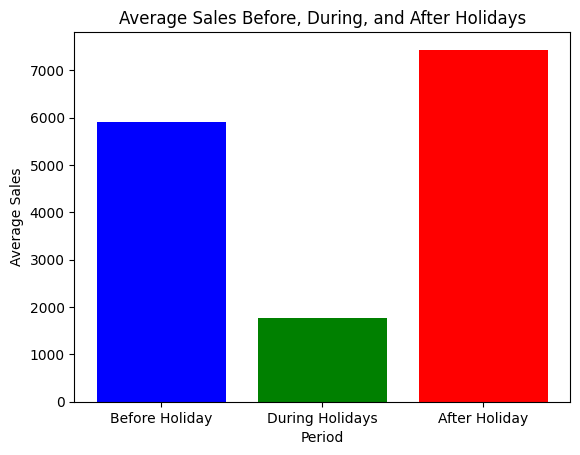

In [12]:
# Plotting
labels = ['Before Holiday', 'During Holidays', 'After Holiday']
avg_sales = [avg_sale_before_holiday, avg_sale_during_holidays, avg_sale_after_holiday]

plt.bar(labels, avg_sales, color=['blue', 'green', 'red'])
plt.title('Average Sales Before, During, and After Holidays')
plt.xlabel('Period')
plt.ylabel('Average Sales')
plt.show()

**Sales during holidays tend to dip compared to periods before and after holidays. Additionally, post-holiday sales exhibit a noticeable increase in comparison to pre-holiday sales.**

#### Find out any seasonal (Christmas, Easter etc) purchase behaviours.

**a = public holiday, b = Easter holiday, c = Christmas, 0 = None**

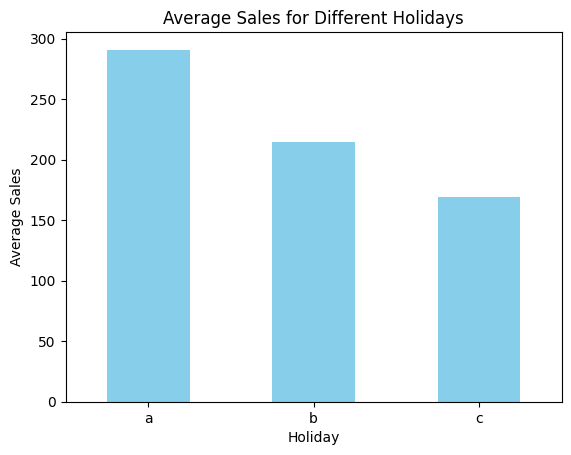

In [13]:
# Filter out 'None' category
filtered_train_df = train_df[train_df['StateHoliday'] != '0']

# Calculate average sale for each holiday
avg_sales_per_holiday = filtered_train_df[filtered_train_df['Date'].isin(holiday_dates)].groupby('StateHoliday')['Sales'].mean()

# Plotting
avg_sales_per_holiday.plot(kind='bar', color='skyblue')
plt.title('Average Sales for Different Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

**The highest sales occur during public holidays (a), surpassing those during Easter holidays (b) and Christmas (c). Furthermore, Easter holiday sales are comparatively lower than those during other holidays.**

### Correlation between sales and number of customers

In [14]:
# Calculate correlation
correlation = train_df['Sales'].corr(train_df['Customers'])
print("Correlation between Sales and Customers:", correlation)

Correlation between Sales and Customers: 0.8947107733016958


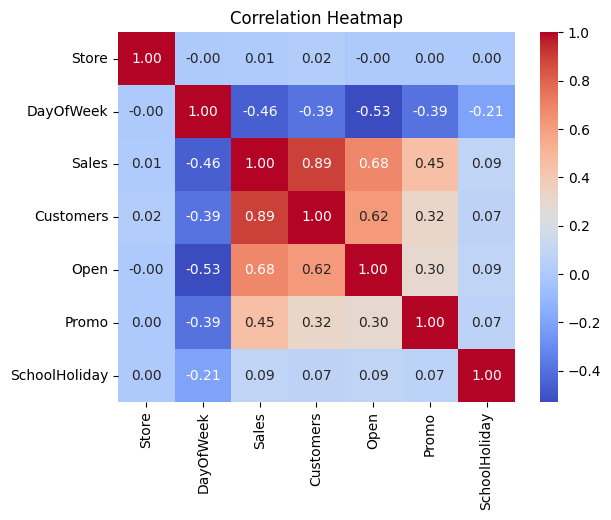

In [15]:
# Exclude non-numeric columns
numeric_df = train_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

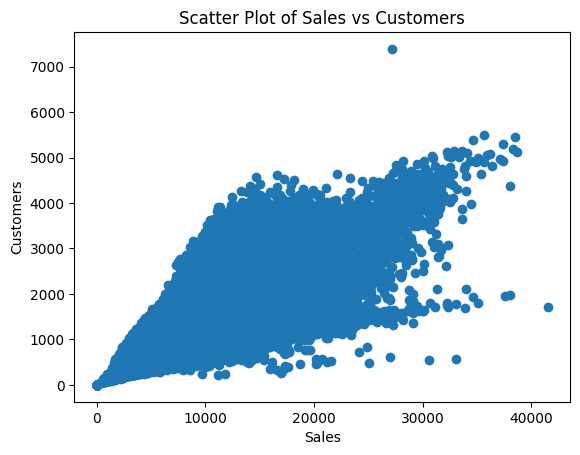

In [16]:
# Plotting Scatter plot for Sales and Customers
plt.scatter(train_df['Sales'], train_df['Customers'])
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.title('Scatter Plot of Sales vs Customers')
plt.show()

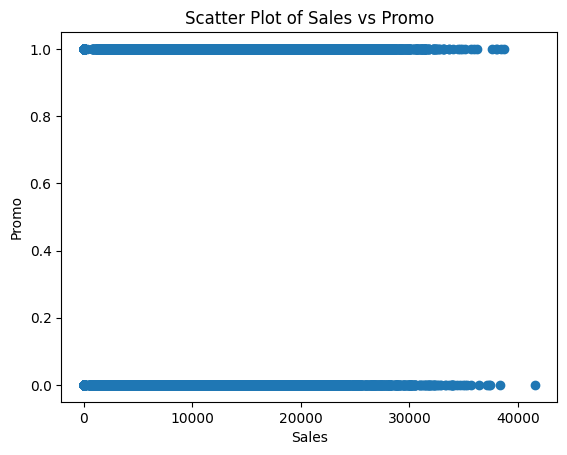

In [17]:
# Plotting Scatter plot for Sale and Promotion
plt.scatter(train_df['Sales'], train_df['Promo'])
plt.xlabel('Sales')
plt.ylabel('Promo')
plt.title('Scatter Plot of Sales vs Promo')
plt.show()

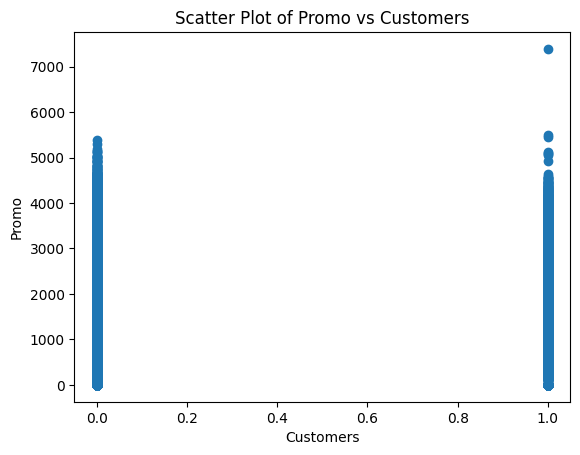

In [18]:
# Plotting Scatter plot for Promotion and Customers
plt.scatter(train_df['Promo'], train_df['Customers'])
plt.xlabel('Customers')
plt.ylabel('Promo')
plt.title('Scatter Plot of Promo vs Customers')
plt.show()

**Analysis via a heatmap and different scatter plots reveals a positive correlation between Sales and Customers, as well as with Store Opening and Promotion. Sales exhibits a strong association with customer engagement.**

In [19]:
# Correlation between Promo and Sales
promo_sales_correlation = train_df['Promo'].corr(train_df['Sales'])
print("Correlation between Promo and Sales:", promo_sales_correlation)

# Correlation between Promo and Customers
promo_customers_correlation = train_df['Promo'].corr(train_df['Customers'])
print("Correlation between Promo and Customers:", promo_customers_correlation)

# Effect on Existing Customers
# Calculate average sales during promotions and non-promotional periods
avg_sales_promo = train_df[train_df['Promo'] == 1]['Sales'].mean()
avg_sales_no_promo = train_df[train_df['Promo'] == 0]['Sales'].mean()

# Calculate average number of customers during promotions and non-promotional periods
avg_customers_promo = train_df[train_df['Promo'] == 1]['Customers'].mean()
avg_customers_no_promo = train_df[train_df['Promo'] == 0]['Customers'].mean()

print("Average Sales during Promo:", avg_sales_promo)
print("Average Sales without Promo:", avg_sales_no_promo)

print("Average Customers during Promo:", avg_customers_promo)
print("Average Customers without Promo:", avg_customers_no_promo)

Correlation between Promo and Sales: 0.4523447198240602
Correlation between Promo and Customers: 0.31616947667428735
Average Sales during Promo: 7991.152045969903
Average Sales without Promo: 4406.050805160786
Average Customers during Promo: 820.0988146773861
Average Customers without Promo: 517.8235417537579


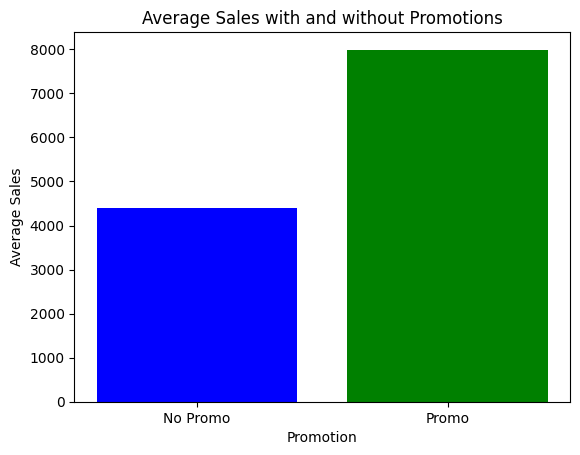

In [20]:
# Bar Plot of Average Sales with and without Promotions
avg_sales_data = [avg_sales_no_promo, avg_sales_promo]
labels = ['No Promo', 'Promo']
plt.bar(labels, avg_sales_data, color=['blue', 'green'])
plt.title('Average Sales with and without Promotions')
plt.xlabel('Promotion')
plt.ylabel('Average Sales')
plt.show()

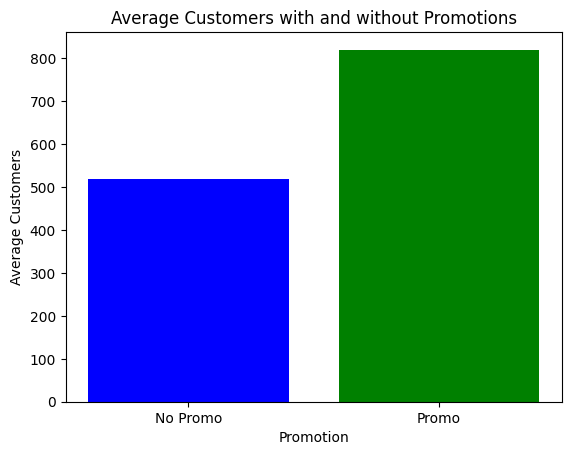

In [21]:
# Bar Plot of Average Customers with and without Promotions
avg_customers_data = [avg_customers_no_promo, avg_customers_promo]
plt.bar(labels, avg_customers_data, color=['blue', 'green'])
plt.title('Average Customers with and without Promotions')
plt.xlabel('Promotion')
plt.ylabel('Average Customers')
plt.show()

**Analysis using bar plots clearly demonstrates that promotions have a significant impact on customer attraction, consequently leading to higher sales.**

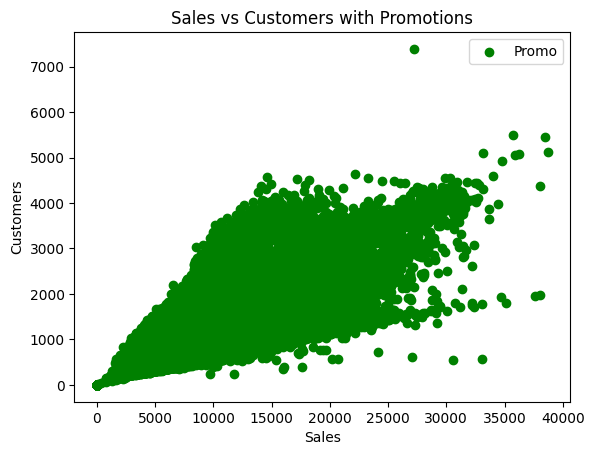

In [22]:
# Scatter Plot of Sales vs Customers with Promotions
plt.scatter(train_df[train_df['Promo'] == 1]['Sales'], train_df[train_df['Promo'] == 1]['Customers'], color='green', label='Promo')
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.title('Sales vs Customers with Promotions')
plt.legend()
plt.show()

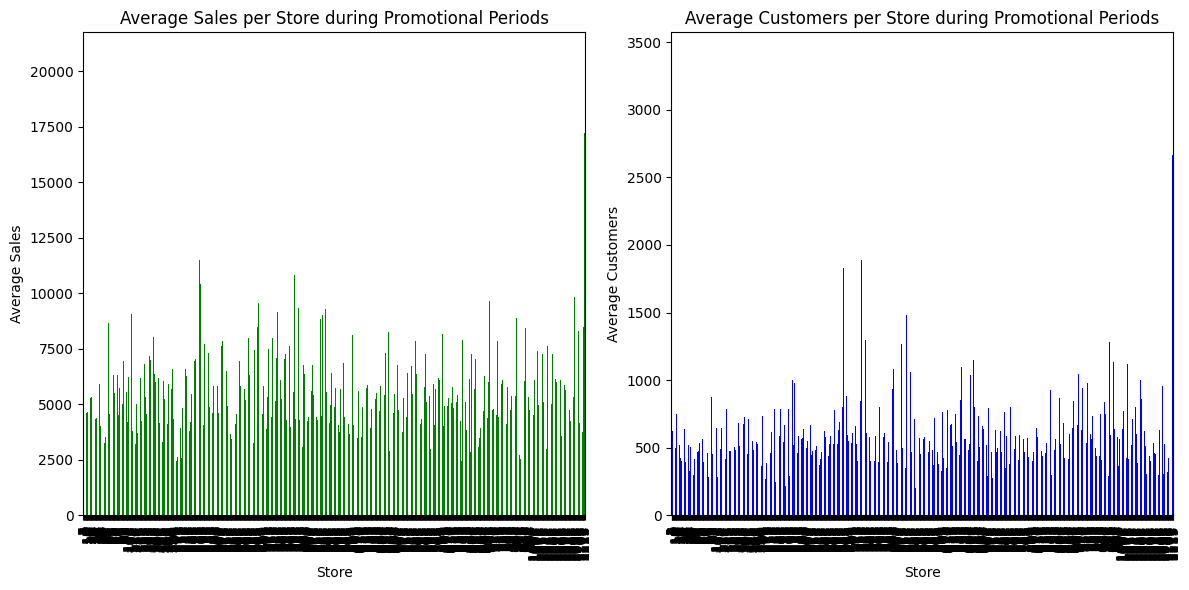

In [23]:
# Calculate average sales and customers for each store during promotional and non-promotional periods
avg_sales_per_store_promo = train_df.groupby('Store')['Sales'].mean()
avg_customers_per_store_promo = train_df.groupby('Store')['Customers'].mean()

# Plotting average sales per store during promotional and non-promotional periods
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
avg_sales_per_store_promo.plot(kind='bar', color='green')
plt.title('Average Sales per Store during Promotional Periods')
plt.xlabel('Store')
plt.ylabel('Average Sales')

# Plotting average customers per store during promotional and non-promotional periods
plt.subplot(1, 2, 2)
avg_customers_per_store_promo.plot(kind='bar', color='blue')
plt.title('Average Customers per Store during Promotional Periods')
plt.xlabel('Store')
plt.ylabel('Average Customers')

plt.tight_layout()
plt.show()

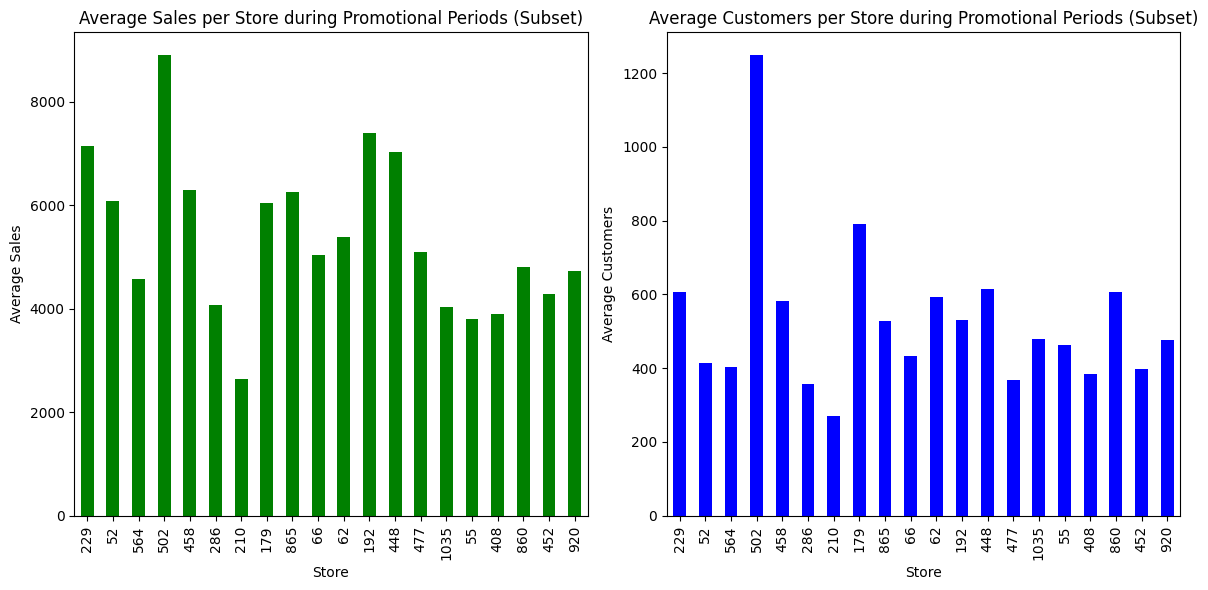

In [24]:
# Selecting a random subset of stores for visualization (20 stores)
import random
random.seed(42)  # Setting seed for reproducibility
selected_stores = random.sample(list(avg_sales_per_store_promo.index), 20)

# Filter data for selected stores
avg_sales_subset = avg_sales_per_store_promo.loc[selected_stores]
avg_customers_subset = avg_customers_per_store_promo.loc[selected_stores]

# Plotting average sales per store for the subset of stores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
avg_sales_subset.plot(kind='bar', color='green')
plt.title('Average Sales per Store during Promotional Periods (Subset)')
plt.xlabel('Store')
plt.ylabel('Average Sales')

# Plotting average customers per store for the subset of stores
plt.subplot(1, 2, 2)
avg_customers_subset.plot(kind='bar', color='blue')
plt.title('Average Customers per Store during Promotional Periods (Subset)')
plt.xlabel('Store')
plt.ylabel('Average Customers')

plt.tight_layout()
plt.show()

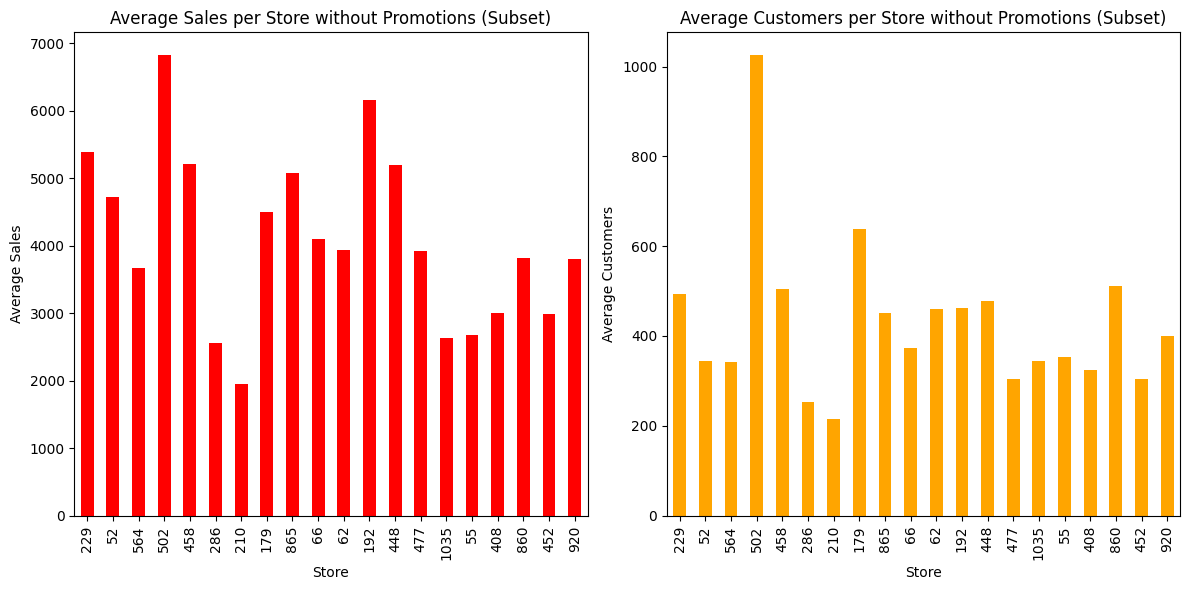

In [25]:
# Calculate average sales and customers for each store during non-promotional periods
avg_sales_per_store_no_promo = train_df[train_df['Promo'] == 0].groupby('Store')['Sales'].mean()
avg_customers_per_store_no_promo = train_df[train_df['Promo'] == 0].groupby('Store')['Customers'].mean()

# Selecting a random subset of stores for visualization (20 stores)
import random
random.seed(42)  # Setting seed for reproducibility
selected_stores = random.sample(list(avg_sales_per_store_no_promo.index), 20)

# Filter data for selected stores
avg_sales_subset_no_promo = avg_sales_per_store_no_promo.loc[selected_stores]
avg_customers_subset_no_promo = avg_customers_per_store_no_promo.loc[selected_stores]

# Plotting average sales per store for the subset of stores without promotions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
avg_sales_subset_no_promo.plot(kind='bar', color='red')
plt.title('Average Sales per Store without Promotions (Subset)')
plt.xlabel('Store')
plt.ylabel('Average Sales')

# Plotting average customers per store for the subset of stores without promotions
plt.subplot(1, 2, 2)
avg_customers_subset_no_promo.plot(kind='bar', color='orange')
plt.title('Average Customers per Store without Promotions (Subset)')
plt.xlabel('Store')
plt.ylabel('Average Customers')

plt.tight_layout()
plt.show()

**Upon reviewing the above bar graphs, it becomes apparent that promotions play a pivotal role in attracting more customers and subsequently driving higher sales. There is potential to implement additional promotions at stores experiencing lower sales**

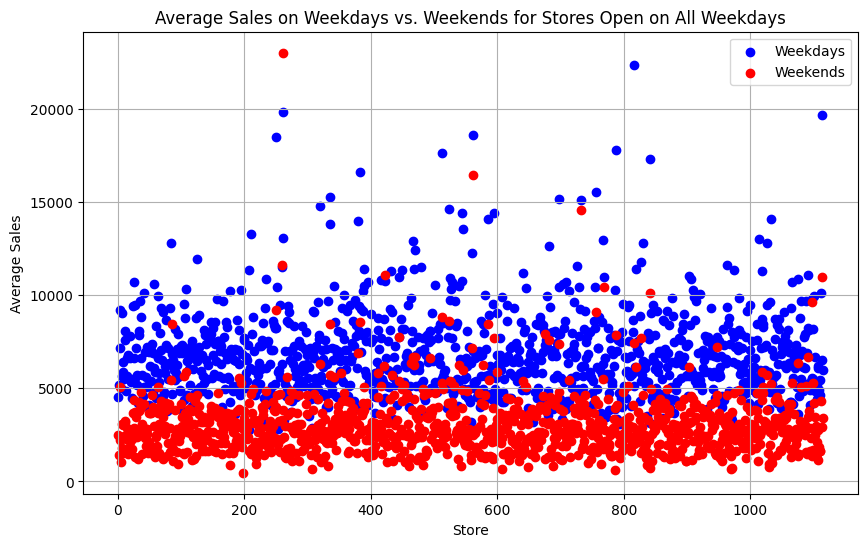

In [26]:
# Check if the store is open on all weekdays (Monday through Friday)
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
stores_open_on_weekdays = train_df[(train_df['Open'] == 1) & 
                                   (train_df['DayOfWeek'].isin([1, 2, 3, 4, 5]))]['Store'].unique()

# Filter the dataframe for stores open on all weekdays
stores_open_on_weekdays_df = train_df[train_df['Store'].isin(stores_open_on_weekdays)]

# Group by Store and DayOfWeek to calculate average sales
avg_sales_by_store_and_day = stores_open_on_weekdays_df.groupby(['Store', 'DayOfWeek'])['Sales'].mean().reset_index()

# Calculate average sales on weekdays and weekends for each store
avg_sales_weekdays = avg_sales_by_store_and_day[avg_sales_by_store_and_day['DayOfWeek'].isin([1, 2, 3, 4, 5])].groupby('Store')['Sales'].mean()
avg_sales_weekends = avg_sales_by_store_and_day[avg_sales_by_store_and_day['DayOfWeek'].isin([6, 7])].groupby('Store')['Sales'].mean()

# Plotting the comparison of average sales on weekdays vs. weekends
plt.figure(figsize=(10, 6))
plt.scatter(avg_sales_weekdays.index, avg_sales_weekdays.values, color='blue', label='Weekdays')
plt.scatter(avg_sales_weekends.index, avg_sales_weekends.values, color='red', label='Weekends')
plt.title('Average Sales on Weekdays vs. Weekends for Stores Open on All Weekdays')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.show()

**After examining the scatter plot above, a trend emerges: sales tend to be higher on weekdays compared to weekends across stores open every day, albeit with some exceptions where certain stores experience higher sales on weekends.**

In [27]:
store = pd.read_csv('store.csv')
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [28]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [29]:
merged_df = pd.merge(train_df, store, on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [30]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

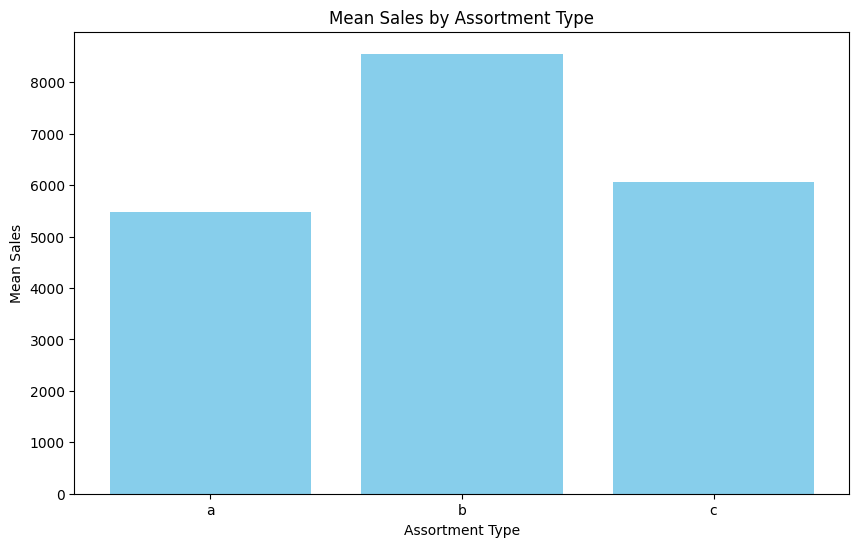

In [31]:
# Group the data by assortment type and calculate the mean sales for each assortment type
assortment_sales = merged_df.groupby('Assortment')['Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(assortment_sales['Assortment'], assortment_sales['Sales'], color='skyblue')
plt.title('Mean Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Mean Sales')
plt.show()

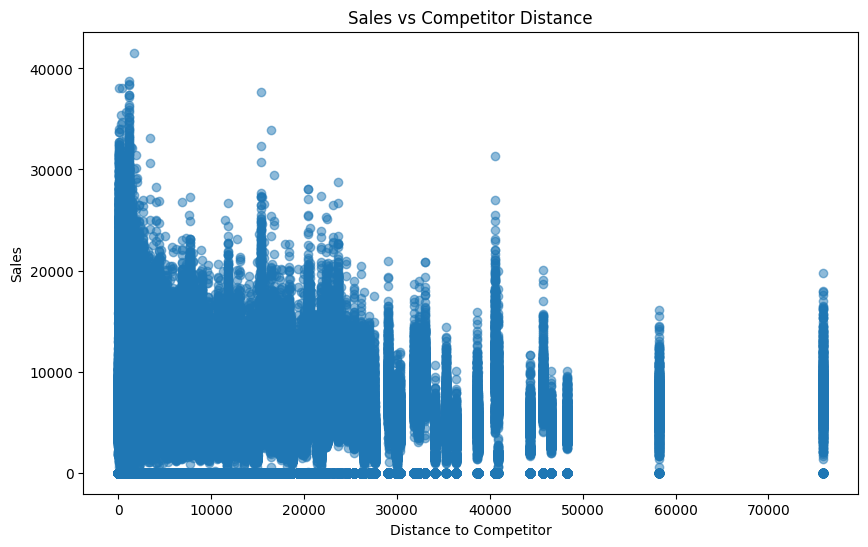

In [32]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['CompetitionDistance'], merged_df['Sales'], alpha=0.5)
plt.title('Sales vs Competitor Distance')
plt.xlabel('Distance to Competitor')
plt.ylabel('Sales')
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_14464\3938459610.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_filled_df['CompetitionDistance'].fillna(merged_filled_df['CompetitionDistance'].median(), inplace=True)


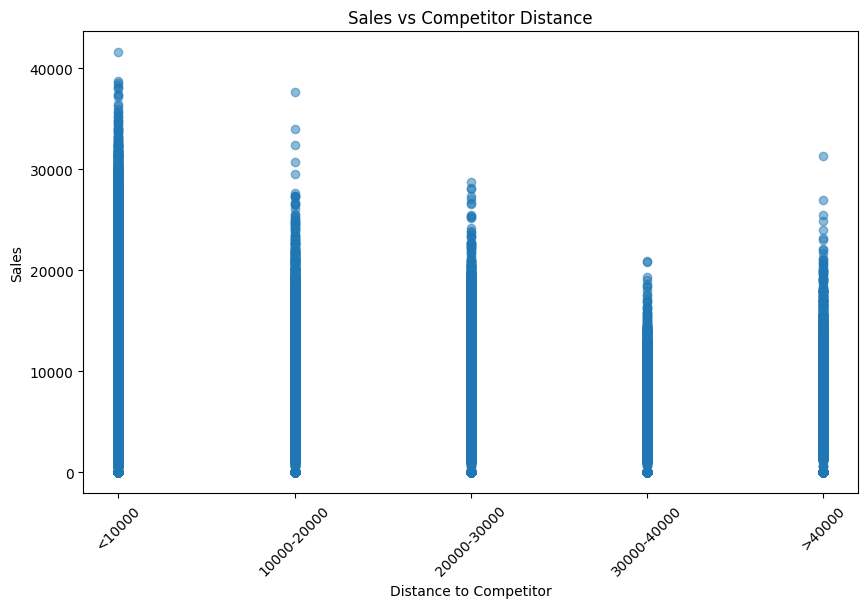

In [33]:
# Create a copy of the DataFrame
merged_filled_df = merged_df.copy()

# Fill missing values in the 'CompetitionDistance' column with the median
merged_filled_df['CompetitionDistance'].fillna(merged_filled_df['CompetitionDistance'].median(), inplace=True)

# Define intervals for competitor distances
bins = [0, 10000, 20000, 30000, 40000, float('inf')]
labels = ['<10000', '10000-20000', '20000-30000', '30000-40000', '>40000']

# Add a new column to the DataFrame indicating the distance interval
merged_filled_df['DistanceCategory'] = pd.cut(merged_filled_df['CompetitionDistance'], bins=bins, labels=labels)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_filled_df['DistanceCategory'], merged_filled_df['Sales'], alpha=0.5)
plt.title('Sales vs Competitor Distance')
plt.xlabel('Distance to Competitor')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

**Based on the analysis of the data, it appears that there is not a consistent linear relationship between competitor distance and sales across all observations. Instead, there are instances where sales are higher when the distance to competitors is greater, suggesting a potential positive impact of distance on sales. However, in the majority of cases, sales tend to be higher in proximity to competitors. This suggests that while distance may play a role in certain scenarios, the presence of competitors in close proximity generally has a stronger influence on sales performance.**

In [34]:
# Filter stores with missing competitor distance initially but later have values
stores_with_missing_distance = merged_df[merged_df['CompetitionDistance'].isnull()]
stores_with_competitor_distance = merged_df[~merged_df['CompetitionDistance'].isnull()]

# Extract store IDs
stores_with_missing_distance_ids = stores_with_missing_distance['Store'].unique()

# Create masks for sales data before and after competitor information becomes available
before_competitor_info_mask = merged_df['Store'].isin(stores_with_missing_distance_ids)
after_competitor_info_mask = ~merged_df['Store'].isin(stores_with_missing_distance_ids)

# Sales data before competitor information becomes available
sales_before_competitor_info = merged_df[before_competitor_info_mask]['Sales']

# Sales data after competitor information becomes available
sales_after_competitor_info = merged_df[after_competitor_info_mask]['Sales']

# Calculate average sales before and after competitor information becomes available
avg_sales_before_competitor_info = sales_before_competitor_info.mean()
avg_sales_after_competitor_info = sales_after_competitor_info.mean()

# Print average sales
print("Average Sales Before Competitor Info:", avg_sales_before_competitor_info)
print("Average Sales After Competitor Info:", avg_sales_after_competitor_info)

Average Sales Before Competitor Info: 4535.892884178653
Average Sales After Competitor Info: 5777.042614238389


**The output indicates that there is an increase in average sales after competitor information becomes available. Before competitor information is available, the average sales are approximately $4535.89, whereas after competitor information becomes available, the average sales increase to approximately $5777.04.**

**This suggests that the presence or knowledge of competitors may influence customer behavior or store strategies, leading to changes in sales performance. Further analysis could delve into understanding the specific factors driving this increase and how stores adapt to competition.**